In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
rng = np.random.default_rng()

True params:
mu = [-10.   0.   5.]; sigma = [1.2 2.  5. ]; pi = [0.3 0.5 0.2]
Calculated params:
mu = [-9.98949294  0.02276205  5.37576236]; sigma = [1.20620756 2.03809084 4.91452483]; pi = [0.30079612 0.51305744 0.18614644]


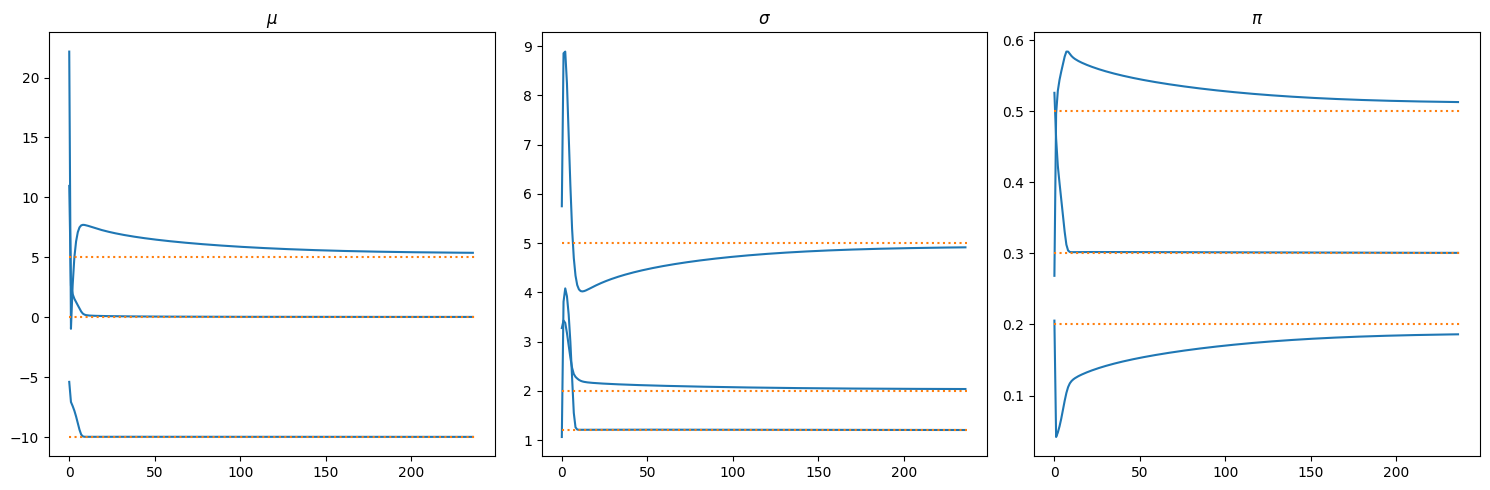

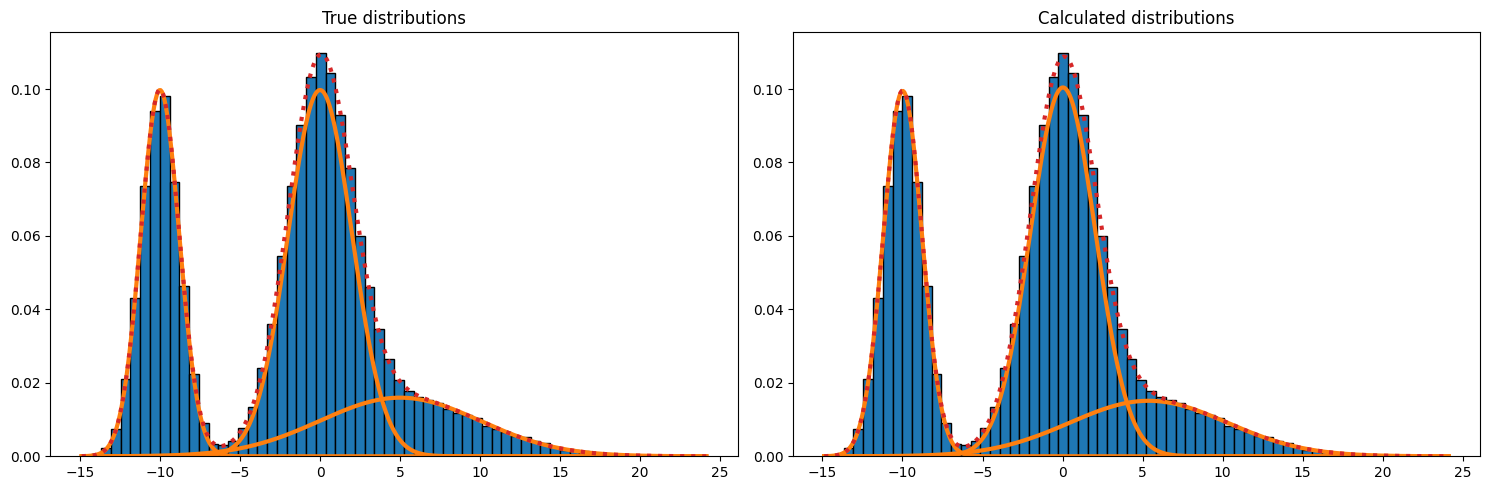

In [9]:
def t1():
    def generate_points(n, params):
        mu, sigma, pi = params
        x = np.hstack([mu[:, np.newaxis], sigma[:, np.newaxis]])[rng.choice(3, p=pi, size=n)]
        x = rng.normal(x[:, 0], x[:, 1])
        return x
    
    def calculate_params(x):
        n = len(x)
        mu = [rng.uniform(np.min(x), np.max(x), 3)]
        sigma = [rng.uniform(0, (np.max(x) - np.min(x)) / 6, 3)]
        pi = [rng.uniform(0, 1, 3)]
        pi[-1] /= np.sum(pi[-1])
        
        def update_params():
            gamma = pi[-1] * stats.norm.pdf(x[:, np.newaxis], loc=mu[-1], scale=sigma[-1])
            gamma /= np.sum(gamma, axis=1)[:, np.newaxis]
            mu.append((x @ gamma) / np.sum(gamma, axis=0))
            sigma.append(np.sqrt(np.sum(gamma * (x[:, np.newaxis] - mu[-1]) ** 2, axis=0) / np.sum(gamma, axis=0)))
            pi.append(np.sum(gamma, axis=0) / n)
        
        update_params()
        while max(np.max(np.abs(mu[-1] - mu[-2])), np.max(np.abs(sigma[-1] - sigma[-2])), np.max(np.abs(pi[-1] - pi[-2]))) > 0.001:
            update_params()
        
        return np.stack(mu), np.stack(sigma), np.stack(pi)
    
    def output_results(x, calculated_params, true_params):
        mu_calc, sigma_calc, pi_calc = calculated_params
        mu_true, sigma_true, pi_true = true_params
        t = len(pi_calc)
        
        print('True params:')
        print(f'mu = {mu_true}; sigma = {sigma_true}; pi = {pi_true}')
        print('Calculated params:')
        print(f'mu = {mu_calc[-1]}; sigma = {sigma_calc[-1]}; pi = {pi_calc[-1]}')
        
        ar = np.arange(t)
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title(r'$\mu$')
        plt.plot(ar, mu_calc, color='tab:blue')
        plt.hlines(y=mu_true, xmin=0, xmax=t, color='tab:orange', linestyle='dotted')
        plt.subplot(1, 3, 2)
        plt.title(r'$\sigma$')
        plt.plot(ar, sigma_calc, color='tab:blue')
        plt.hlines(y=sigma_true, xmin=0, xmax=t, color='tab:orange', linestyle='dotted')
        plt.subplot(1, 3, 3)
        plt.title(r'$\pi$')
        plt.plot(ar, pi_calc, color='tab:blue')
        plt.hlines(y=pi_true, xmin=0, xmax=t, color='tab:orange', linestyle='dotted')
        plt.tight_layout()
        plt.show()
        
        x_space = np.linspace(np.min(x), np.max(x), 500)
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1)
        plt.title('True distributions')
        plt.hist(x, bins=64, density=True, color='tab:blue', edgecolor='black')
        plt.plot(x_space, stats.norm.pdf(x_space[:, np.newaxis], mu_true, sigma_true) * pi_true, color='tab:orange', linewidth=3)
        plt.plot(x_space, np.sum(stats.norm.pdf(x_space[:, np.newaxis], mu_true, sigma_true) * pi_true, axis=1), color='tab:red', linestyle='dotted', linewidth=3)
        plt.subplot(1, 2, 2)
        plt.title('Calculated distributions')
        plt.hist(x, bins=64, density=True, color='tab:blue', edgecolor='black')
        plt.plot(x_space, stats.norm.pdf(x_space[:, np.newaxis], mu_calc[-1], sigma_calc[-1]) * pi_calc[-1], color='tab:orange', linewidth=3)
        plt.plot(x_space, np.sum(stats.norm.pdf(x_space[:, np.newaxis], mu_calc[-1], sigma_calc[-1]) * pi_calc[-1], axis=1), color='tab:red', linestyle='dotted', linewidth=3)
        plt.tight_layout()
        plt.show()
    
    def main():
        true_params = (
            np.array([-10.0, 0.0, 5.0]),
            np.array([  1.2, 2.0, 5.0]),
            np.array([  0.3, 0.5, 0.2])
        )
        x = generate_points(100000, true_params)
        output_results(x, calculate_params(x), true_params)
    
    main()

t1()

True params:
lambda = [ 1  6 12]; pi = [0.4  0.25 0.35]
Calculated params:
lambda = [ 1.00155903 11.96719825  6.00204028]; pi = [0.39580712 0.35362279 0.2505701 ]


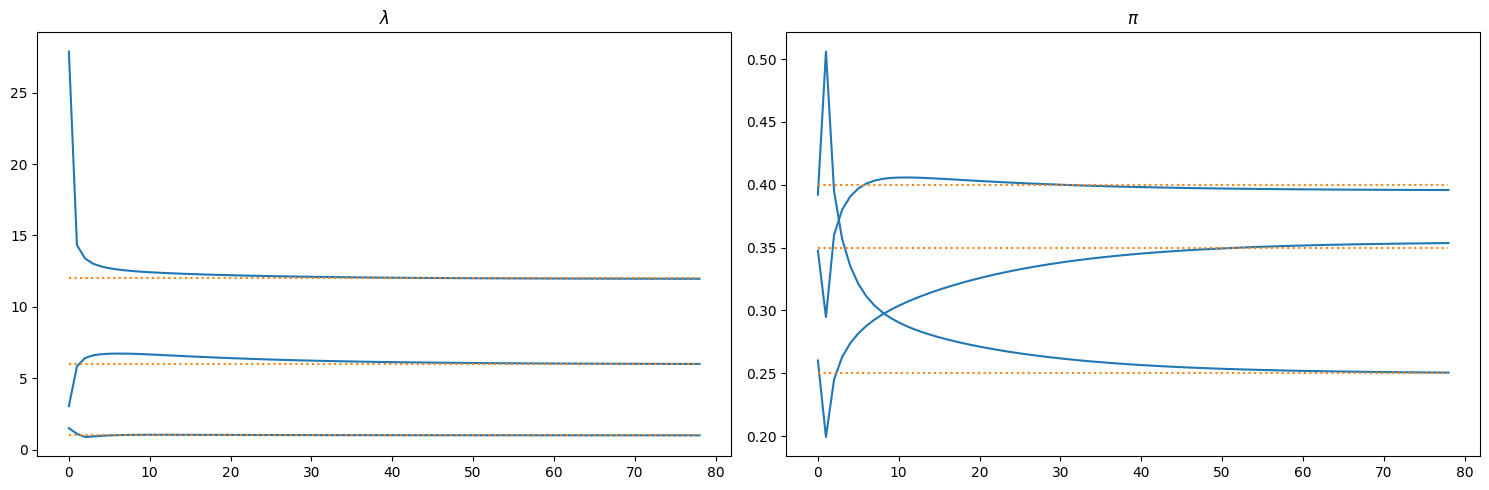

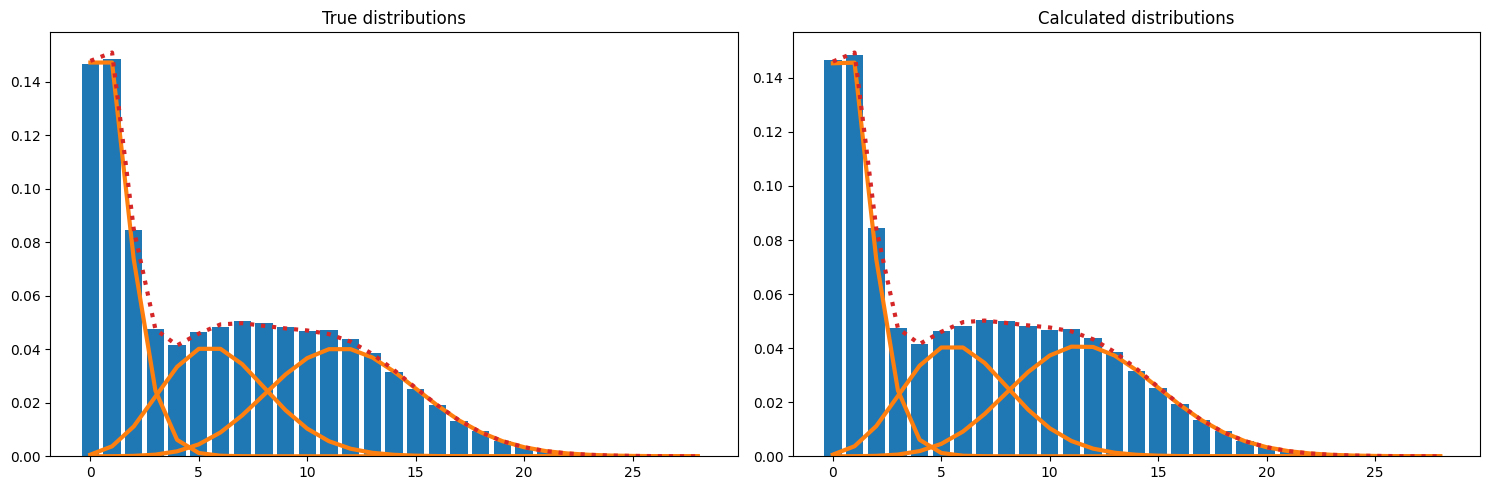

In [10]:
def t2():
    def generate_points(n, params):
        lam, pi = params
        return rng.poisson(rng.choice(lam, p=pi, size=n))
    
    def calculate_params(x):
        n = len(x)
        lam = [rng.uniform(np.min(x), np.max(x), 3)]
        pi = [rng.uniform(0, 1, 3)]
        pi[-1] /= np.sum(pi[-1])
        
        def update_params():
            gamma = pi[-1] * stats.poisson.pmf(x[:, np.newaxis], lam[-1])
            gamma /= np.sum(gamma, axis=1)[:, np.newaxis]
            lam.append((x @ gamma) / np.sum(gamma, axis=0))
            pi.append(np.sum(gamma, axis=0) / n)
        
        update_params()
        while max(np.max(np.abs(lam[-1] - lam[-2])), np.max(np.abs(pi[-1] - pi[-2]))) > 0.001:
            update_params()
        
        return np.stack(lam), np.stack(pi)
    
    def output_results(x, calculated_params, true_params):
        lam_calc, pi_calc = calculated_params
        lam_true, pi_true = true_params
        t = len(pi_calc)
        
        print('True params:')
        print(f'lambda = {lam_true}; pi = {pi_true}')
        print('Calculated params:')
        print(f'lambda = {lam_calc[-1]}; pi = {pi_calc[-1]}')
        
        ar = np.arange(t)
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1)
        plt.title(r'$\lambda$')
        plt.plot(ar, lam_calc, color='tab:blue')
        plt.hlines(y=lam_true, xmin=0, xmax=(t - 1), color='tab:orange', linestyle='dotted')
        plt.subplot(1, 2, 2)
        plt.title(r'$\pi$')
        plt.plot(ar, pi_calc, color='tab:blue')
        plt.hlines(y=pi_true, xmin=0, xmax=(t - 1), color='tab:orange', linestyle='dotted')
        plt.tight_layout()
        plt.show()
        
        ar = np.arange(np.max(x) + 1)
        un, cnt = np.unique(x, return_counts=True)
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1)
        plt.title('True distributions')
        plt.bar(un, cnt / np.sum(cnt), color='tab:blue')
        plt.plot(ar, stats.poisson.pmf(ar[:, np.newaxis], lam_true) * pi_true, color='tab:orange', linewidth=3)
        plt.plot(ar, np.sum(stats.poisson.pmf(ar[:, np.newaxis], lam_true) * pi_true, axis=1), color='tab:red', linestyle='dotted', linewidth=3)
        plt.subplot(1, 2, 2)
        plt.title('Calculated distributions')
        plt.bar(un, cnt / np.sum(cnt), color='tab:blue')
        plt.plot(ar, stats.poisson.pmf(ar[:, np.newaxis], lam_calc[-1]) * pi_calc[-1], color='tab:orange', linewidth=3)
        plt.plot(ar, np.sum(stats.poisson.pmf(ar[:, np.newaxis], lam_calc[-1]) * pi_calc[-1], axis=1), color='tab:red', linestyle='dotted', linewidth=3)
        plt.tight_layout()
        plt.show()
    
    def main():
        true_params = (
            np.array([1, 6, 12]),
            np.array([0.4, 0.25, 0.35])
        )
        x = generate_points(100000, true_params)
        output_results(x, calculate_params(x), true_params)
    
    main()

t2()

True params:
lambda =
[[0.23423387 0.31523347 0.25313742 0.16710561 0.03028963]
 [0.13005167 0.27491121 0.08708194 0.28688601 0.22106918]
 [0.21522999 0.37487411 0.13838858 0.00398417 0.26752316]]
pi = [0.19924794 0.41702751 0.38372455]
Calculated params:
lambda =
[[0.21547498 0.37488141 0.13823543 0.00397223 0.26743596]
 [0.12981263 0.27487129 0.08694547 0.28717168 0.22119892]
 [0.23410373 0.31529216 0.25296573 0.16722403 0.03041435]]
pi = [0.38326736 0.41614951 0.20058313]


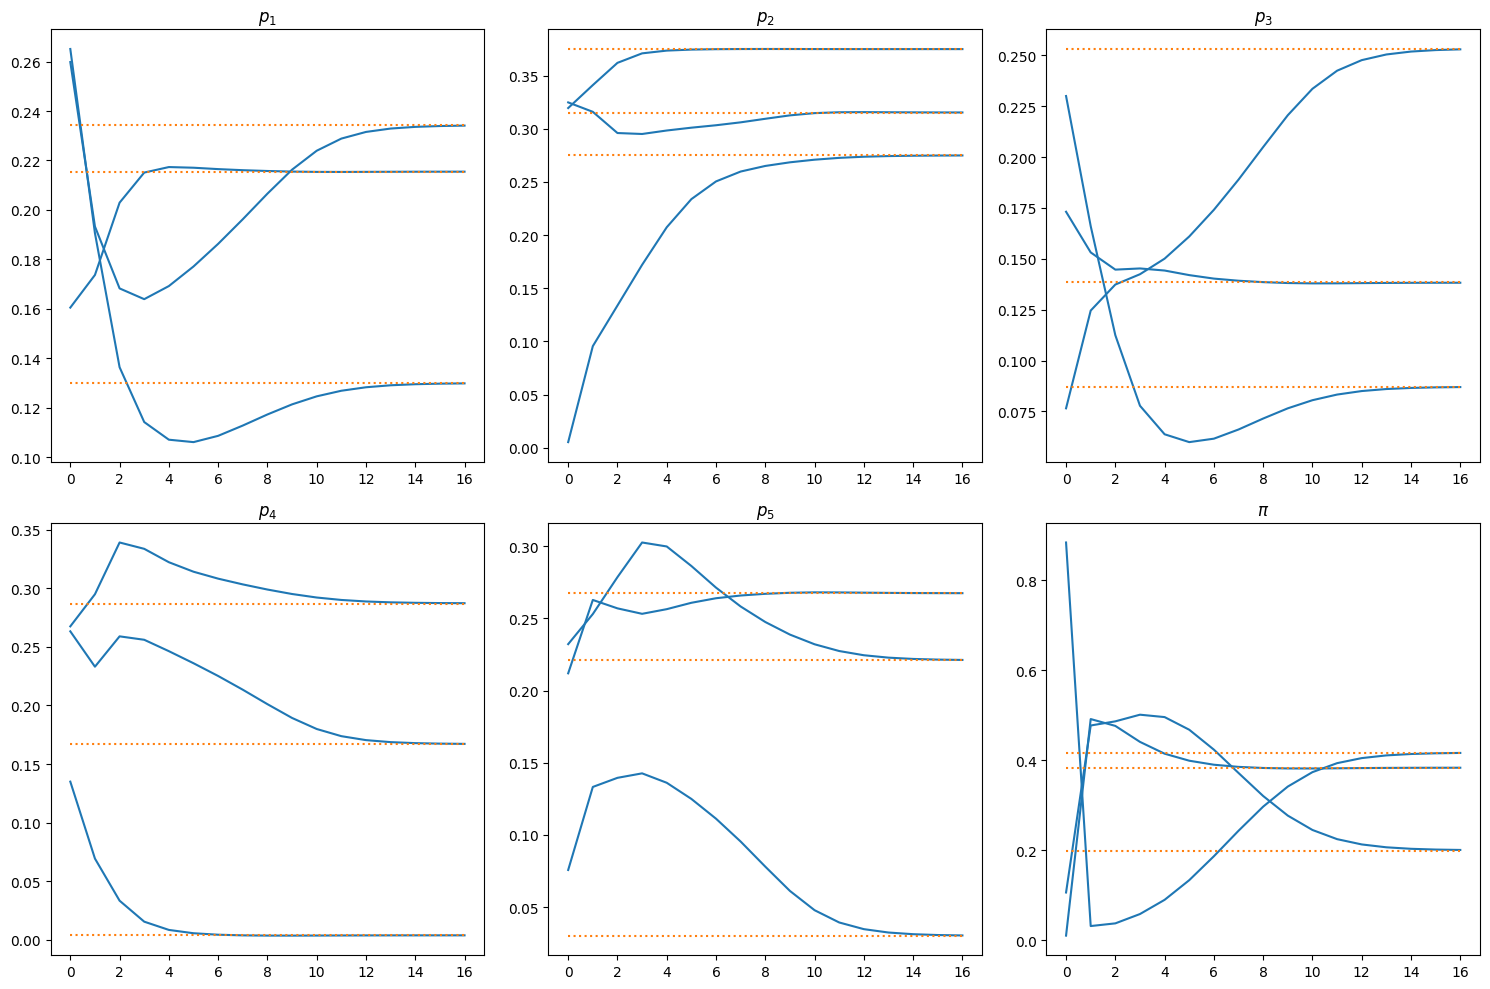

In [44]:
def t3():
    n_param = 20
    k_param = 5
    k = 3   # distributions count
    
    def generate_points(n, params):
        p, pi = params
        return rng.multinomial(n_param, p[rng.choice(k, p=pi, size=n)])
    
    def calculate_params(x):
        n = len(x)
        p = [rng.uniform(0, 1, size=(k, k_param))]
        p[-1] /= np.sum(p[-1], axis=1)[:, np.newaxis]
        pi = [rng.uniform(0, 1, size=k)]
        pi[-1] /= np.sum(pi[-1])

        def update_params():
            gamma = pi[-1] * stats.multinomial.pmf(x[:, np.newaxis, :], n_param, p[-1])
            gamma /= np.sum(gamma, axis=1)[:, np.newaxis]
            p.append(np.sum(gamma[:, :, np.newaxis] * x[:, np.newaxis, :], axis=0) / (n_param * np.sum(gamma, axis=0)[:, np.newaxis]))
            pi.append(np.sum(gamma, axis=0) / n)
        
        update_params()
        while max(np.max(np.abs(p[-1] - p[-2])), np.max(np.abs(pi[-1] - pi[-2]))) > 0.001:
            update_params()

        return np.stack(p), np.stack(pi)

    def output_results(calculated_params, true_params):
        p_calc, pi_calc = calculated_params
        p_true, pi_true = true_params
        t = len(pi_calc)

        print('True params:')
        print(f'lambda =\n{p_true}')
        print(f'pi = {pi_true}')
        print('Calculated params:')
        print(f'lambda =\n{p_calc[-1]}')
        print(f'pi = {pi_calc[-1]}')

        ar = np.arange(t)
        plt.figure(figsize=(15, 10))
        for i in range(5):
            plt.subplot(2, 3, i + 1)
            plt.title(f'$p_{i + 1}$')
            plt.plot(ar, p_calc[:, :, i], color='tab:blue')
            plt.hlines(y=p_true[:, i], xmin=0, xmax=(t - 1), color='tab:orange', linestyle='dotted')
        plt.subplot(2, 3, 6)
        plt.title(r'$\pi$')
        plt.plot(ar, pi_calc, color='tab:blue')
        plt.hlines(y=pi_true, xmin=0, xmax=(t - 1), color='tab:orange', linestyle='dotted')
        plt.tight_layout()
        plt.show()
    
    def main():
        p_true = rng.uniform(0, 1, (k, k_param))
        p_true /= np.sum(p_true, axis=1)[:, np.newaxis]
        pi_true = rng.uniform(0, 1, k)
        pi_true /= np.sum(pi_true)
        true_params = (p_true, pi_true)
        x = generate_points(1000000, true_params)
        output_results(calculate_params(x), true_params)
    
    main()

t3()